# Tutorial 2: How to perform AA and AB tests
*AB-test is shown below*

## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from hypex.ab_test import AATest, ABTest
from hypex.utils.tutorial_data_creation import create_test_data

pd.options.display.float_format = '{:,.2f}'.format

np.random.seed(52) # needed to create example data

## 1. Create or upload your dataset
In this case we will create random dataset with known effect size  
If you have your own dataset, go to the part 2 

In [2]:
data = create_test_data(rs=52, na_step=10, nan_cols=['age', 'gender'])
data

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry
0,0,0,0,488.00,414.44,NaN,M,E-commerce
1,3,0,0,501.50,424.33,31.00,NaN,Logistics
2,10,0,0,522.50,416.22,64.00,M,E-commerce
3,12,0,0,472.00,423.78,43.00,M,E-commerce
4,13,0,0,508.50,424.22,36.00,F,E-commerce
...,...,...,...,...,...,...,...,...
5365,9991,0,0,482.50,421.89,23.00,F,E-commerce
5366,9992,0,0,491.50,424.00,44.00,M,E-commerce
5367,9994,0,0,486.00,423.78,27.00,F,Logistics
5368,9996,0,0,500.50,430.89,56.00,F,E-commerce


## 2. AATest 

### 2.0 Initialize parameters
`info_col` used to define informative attributes that should NOT be part of testing, such as user_id and signup_month <br>

In [3]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

### 2.1 Simple AA-test
This is the easiest way to initialize and calculate metrics on a AA-test (default - on 10 iterations)<br>
Use it when you are clear about each attribute or if you don't have any additional task conditions (like grouping)

In [4]:
experiment = AATest( info_cols=info_cols, target_fields=target)

  0%|          | 0/10 [00:00<?, ?it/s]

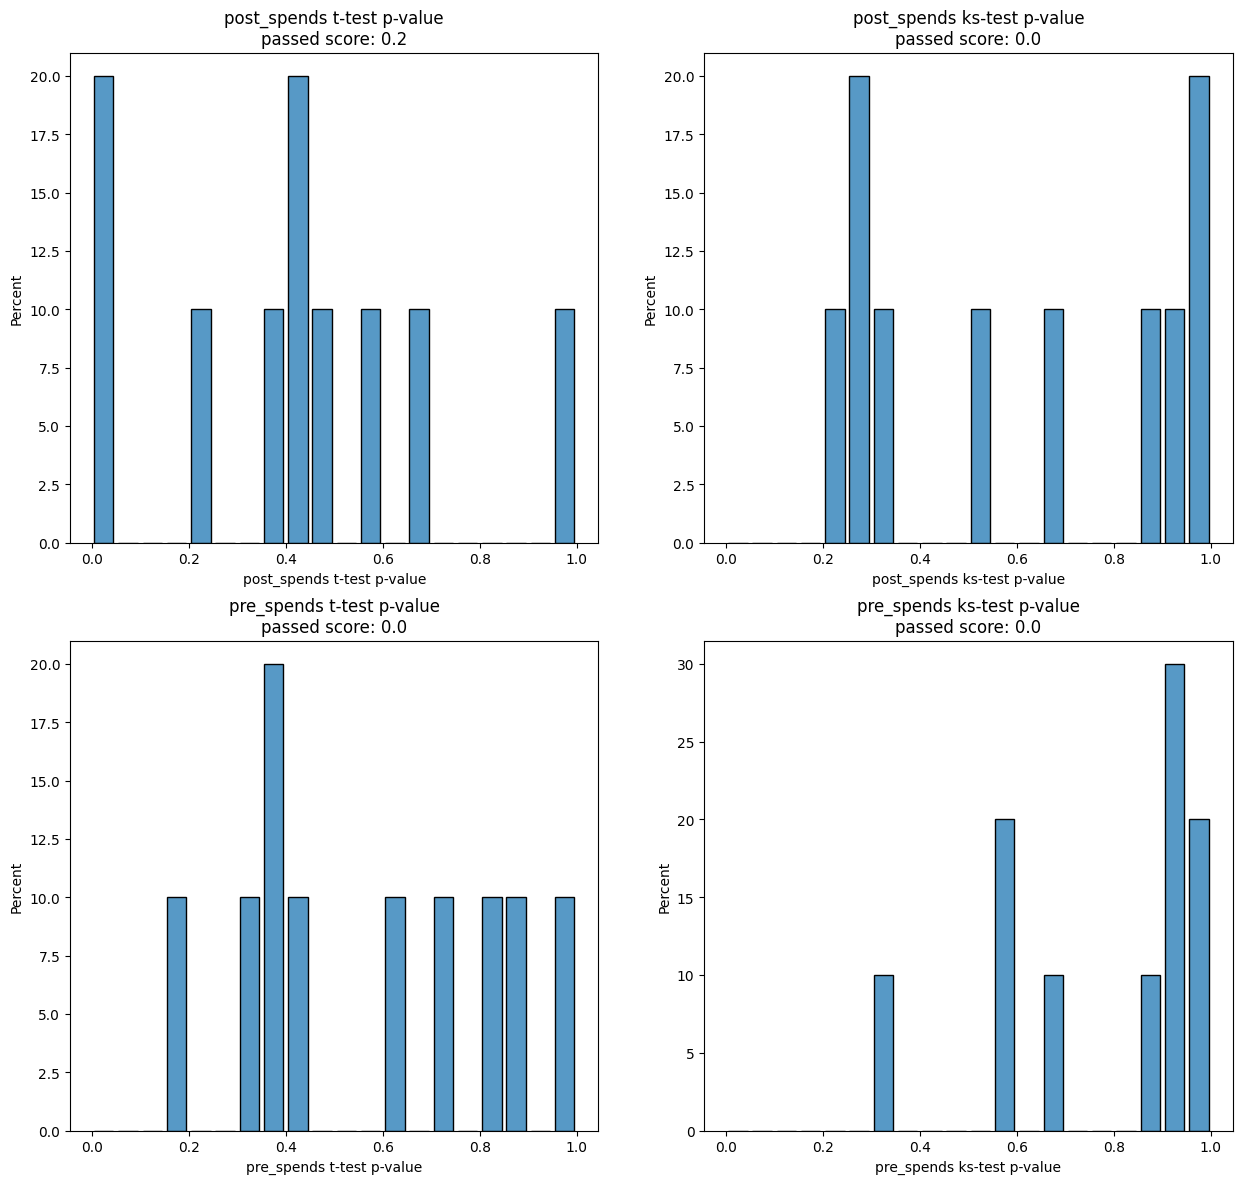

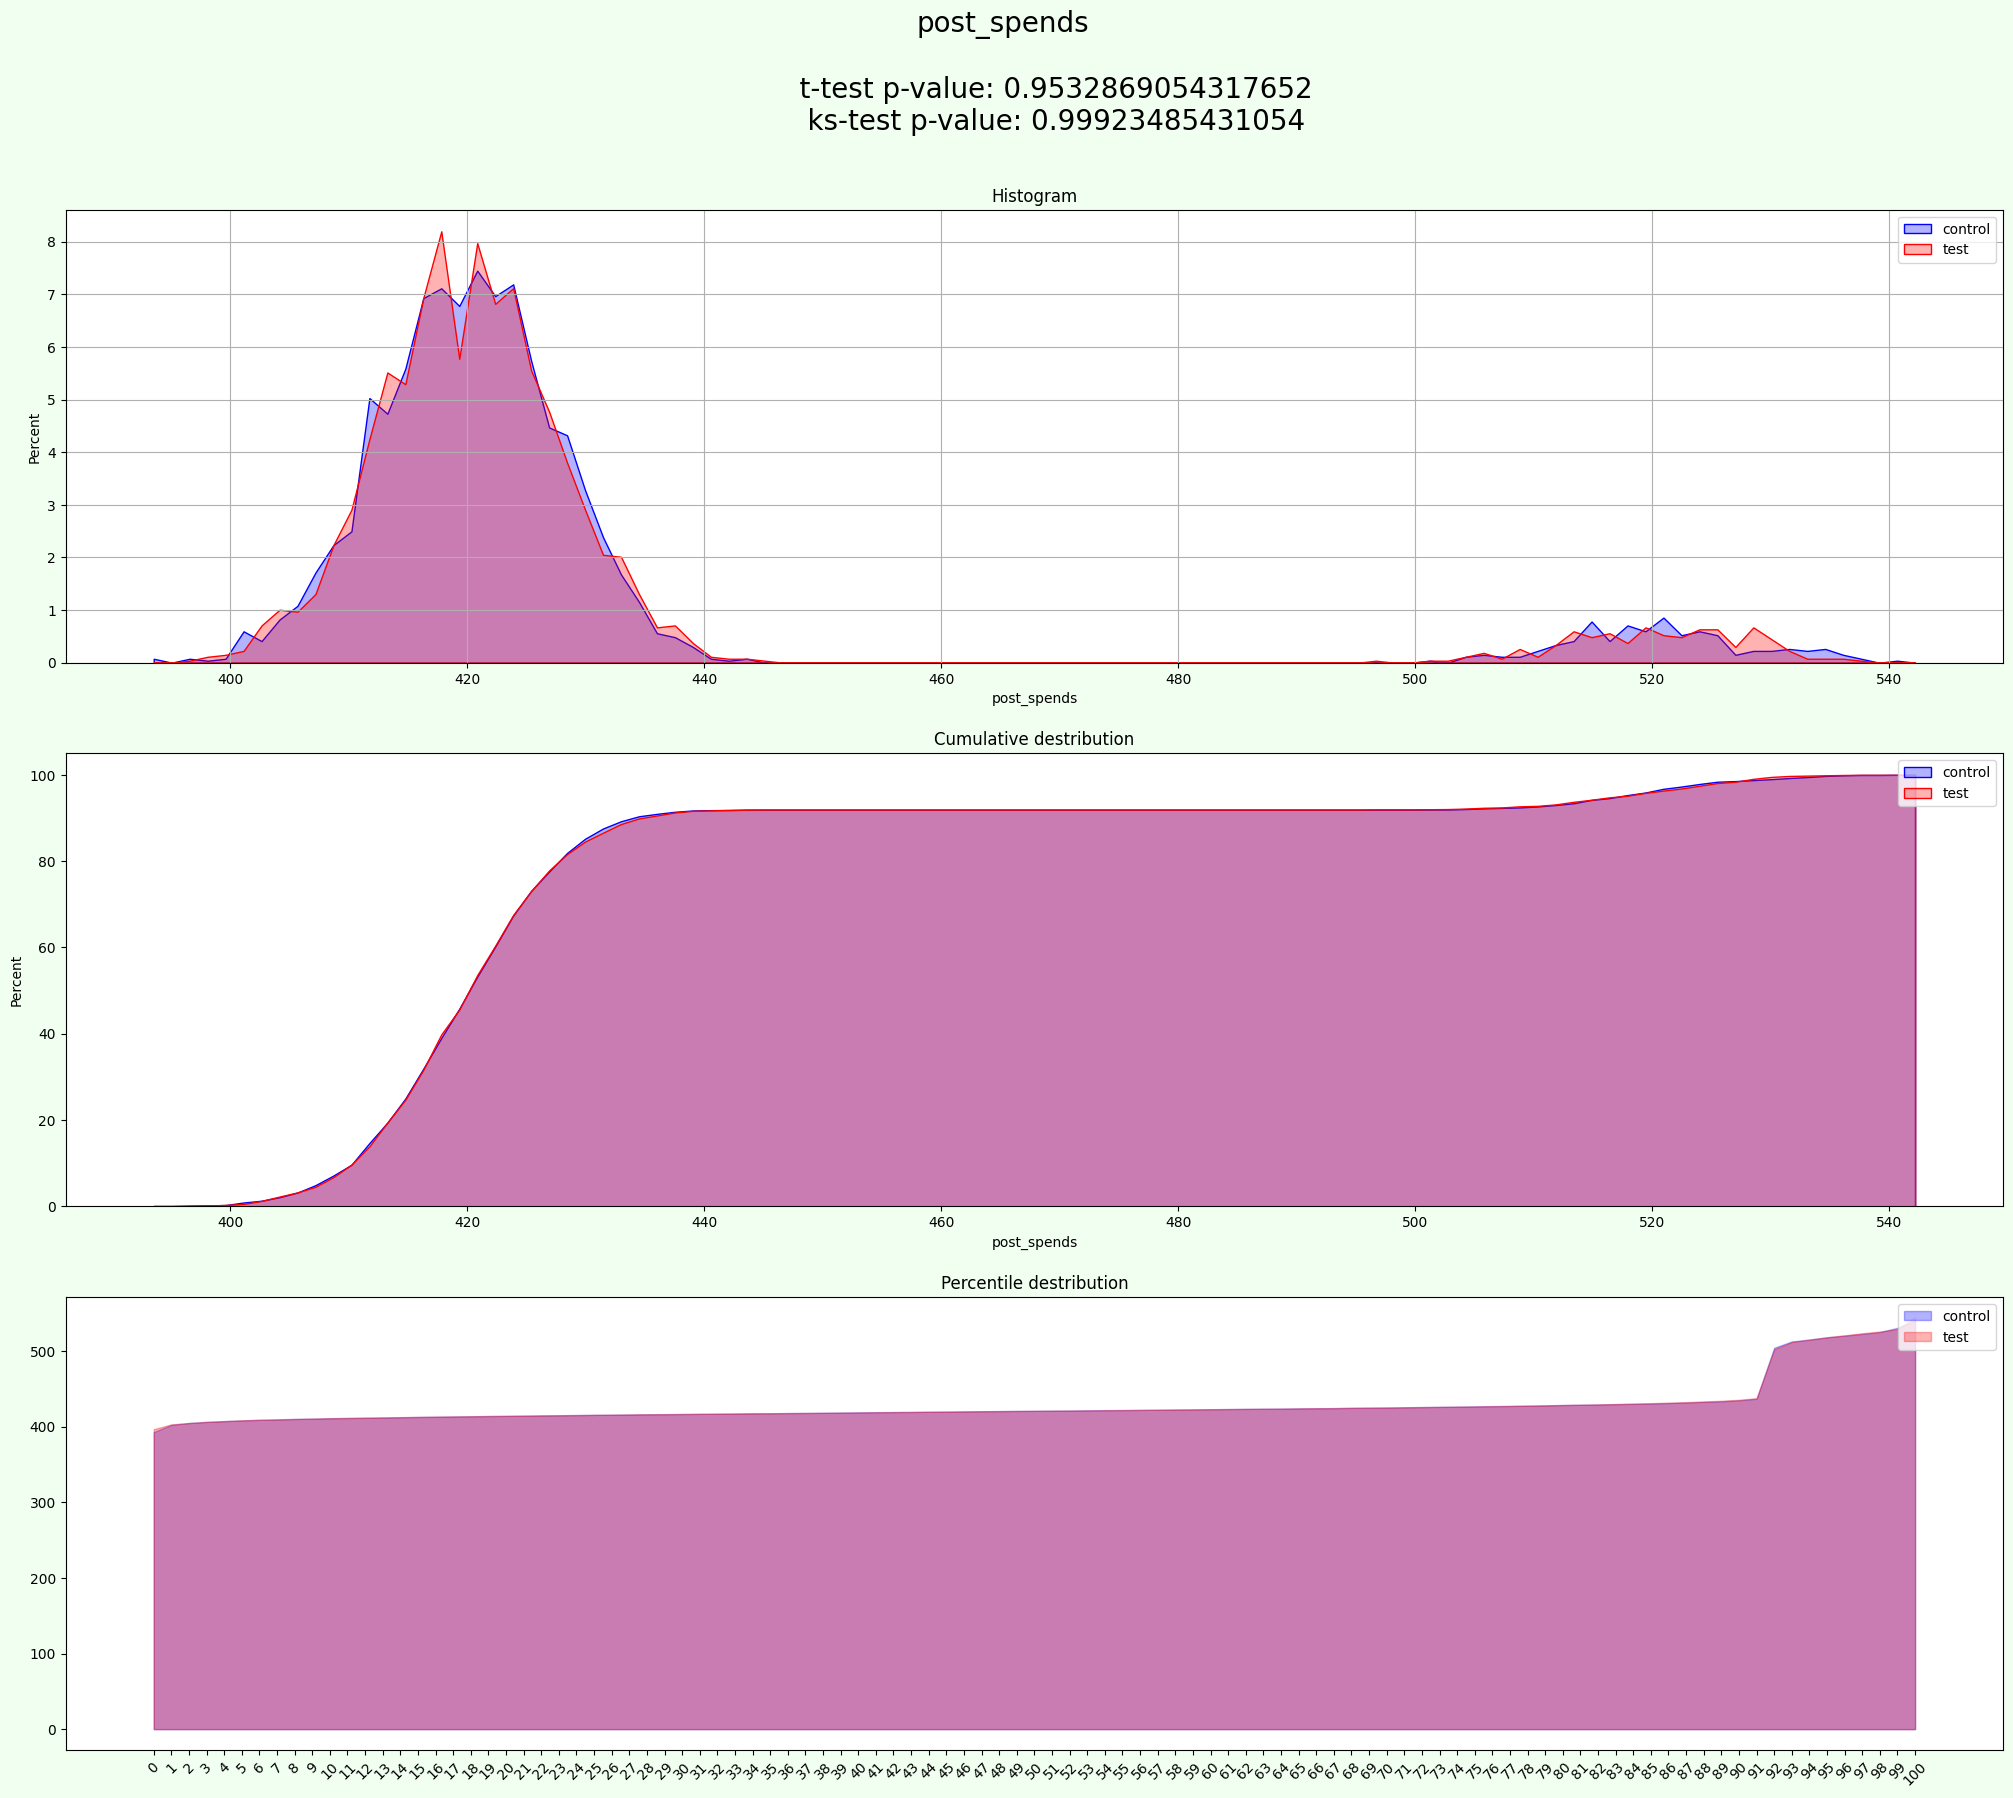

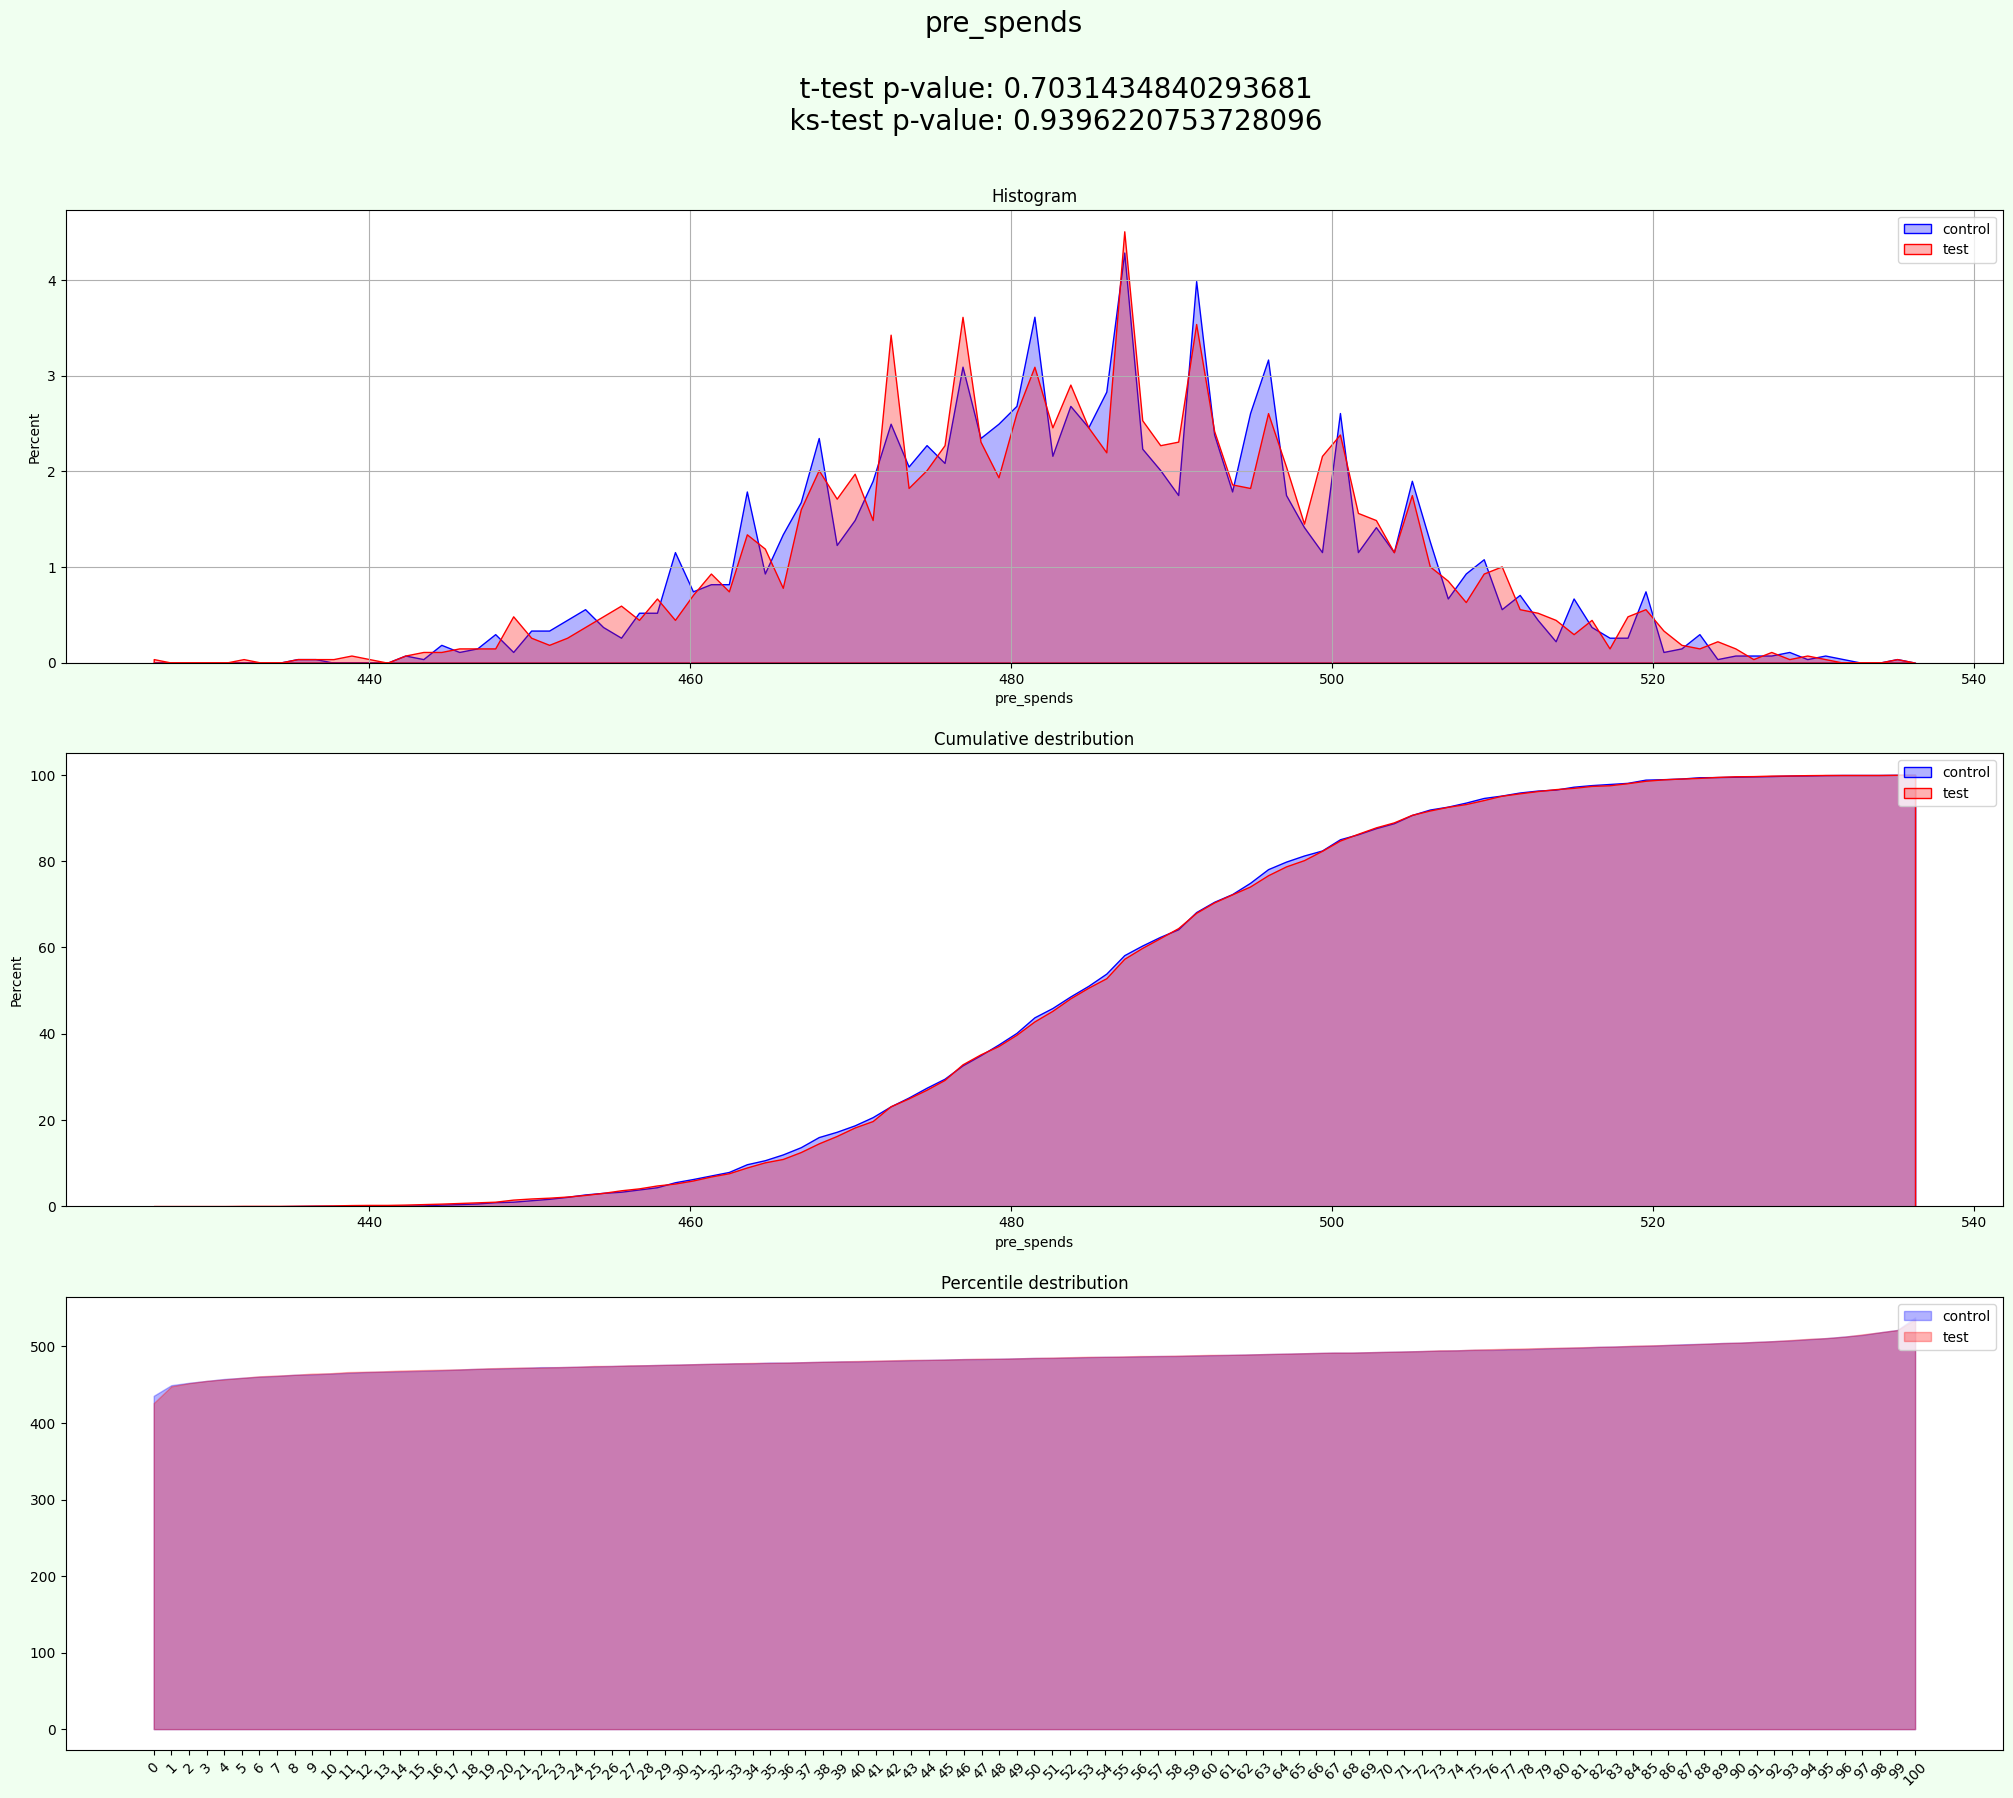

In [5]:
experiment_result, best_split = experiment.process(data, iterations=10)

`experiment_result` is a table of results of experiments, which includes 
- means of all targets in a and b samples, 
- p_values of Student t-test and test Kolmogorova-Smirnova, 
- and results of tests (did data on the random_state passes the uniform test)

In [6]:
experiment_result.sort_values("mean_tests_score")

,random_state,post_spends a mean,post_spends b mean,post_spends ab delta,post_spends ab delta %,post_spends t-test p-value,post_spends ks-test p-value,post_spends t-test passed,post_spends ks-test passed,pre_spends a mean,...,pre_spends ks-test passed,control %,test %,control size,test size,t-test mean p-value,ks-test mean p-value,t-test passed %,ks-test passed %,mean_tests_score
7,7,429.06,427.26,-1.80,-0.42,0.02,0.29,True,False,485.12,...,False,50.00,50.00,2685,2685,0.20,0.31,50.00,0.00,0.27
5,5,427.89,428.43,0.54,0.13,0.49,0.26,False,False,484.71,...,False,50.00,50.00,2685,2685,0.40,0.41,0.00,0.00,0.41
8,8,429.02,427.30,-1.73,-0.40,0.03,0.30,True,False,484.89,...,False,50.00,50.00,2685,2685,0.46,0.61,50.00,0.00,0.56
6,6,428.51,427.82,-0.69,-0.16,0.37,0.22,False,False,484.97,...,False,50.00,50.00,2685,2685,0.60,0.61,0.00,0.00,0.61
0,0,428.48,427.85,-0.63,-0.15,0.42,0.86,False,False,485.22,...,False,50.00,50.00,2685,2685,0.29,0.77,0.00,0.00,0.61
1,1,428.65,427.67,-0.98,-0.23,0.21,0.54,False,False,485.04,...,False,50.00,50.00,2685,2685,0.40,0.73,0.00,0.00,0.62
9,9,428.00,428.33,0.33,0.08,0.67,0.91,False,False,484.74,...,False,50.00,50.00,2685,2685,0.53,0.75,0.00,0.00,0.67
2,2,427.94,428.38,0.44,0.10,0.57,0.96,False,False,485.09,...,False,50.00,50.00,2685,2685,0.51,0.91,0.00,0.00,0.78
3,3,428.47,427.86,-0.61,-0.14,0.43,0.67,False,False,484.93,...,False,50.00,50.00,2685,2685,0.71,0.83,0.00,0.00,0.79
4,4,428.18,428.14,-0.05,-0.01,0.95,1.00,False,False,485.01,...,False,50.00,50.00,2685,2685,0.83,0.97,0.00,0.00,0.92


`dict_of_datas` is a dictionary with random_states as keys and dataframes as values.<br>
Result of separation can be find in column 'group', it contains values 'test' and 'control'

In [7]:
best_split

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,0,0,0,488.00,414.44,NaN,M,E-commerce,test
1,12,0,0,472.00,423.78,43.00,M,E-commerce,test
2,14,0,0,497.00,421.78,26.00,M,Logistics,test
3,15,0,0,464.50,421.67,38.00,F,E-commerce,test
4,16,0,0,498.00,413.33,65.00,M,Logistics,test
...,...,...,...,...,...,...,...,...,...
5365,9991,0,0,482.50,421.89,23.00,F,E-commerce,control
5366,9992,0,0,491.50,424.00,44.00,M,E-commerce,control
5367,9994,0,0,486.00,423.78,27.00,F,Logistics,control
5368,9996,0,0,500.50,430.89,56.00,F,E-commerce,control


#### - Single experiment
To get stable results lets fix `random_state`

In [8]:
random_state = 11

To perform single experiment you can use `sampling_metrics()`

In [9]:
experiment = AATest(info_cols=info_cols, target_fields=target)
metrics, dict_of_datas = experiment.sampling_metrics(data=data, random_state=random_state).values()

The results contains the same info as in multisampling, but on one experiment

In [10]:
metrics

{'random_state': 11,
 'post_spends a mean': 428.5347817090834,
 'post_spends b mean': 427.7893234016139,
 'post_spends ab delta': -0.7454583074695051,
 'post_spends ab delta %': -0.17425827777606262,
 'post_spends t-test p-value': 0.33561550504114157,
 'post_spends ks-test p-value': 0.6263469727648824,
 'post_spends t-test passed': False,
 'post_spends ks-test passed': False,
 'pre_spends a mean': 484.8584729981378,
 'pre_spends b mean': 484.9912476722533,
 'pre_spends ab delta': 0.13277467411546695,
 'pre_spends ab delta %': 0.027376715508320437,
 'pre_spends t-test p-value': 0.7577698697749307,
 'pre_spends ks-test p-value': 0.762662388584242,
 'pre_spends t-test passed': False,
 'pre_spends ks-test passed': False,
 'control %': 50.0,
 'test %': 50.0,
 'control size': 2685,
 'test size': 2685,
 't-test mean p-value': 0.5466926874080361,
 'ks-test mean p-value': 0.6945046806745622,
 't-test passed %': 0.0,
 'ks-test passed %': 0.0,
 'mean_tests_score': 0.6452340162523869}

In [11]:
dict_of_datas[random_state]

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,0,0,0,488.00,414.44,NaN,M,E-commerce,test
1,10,0,0,522.50,416.22,64.00,M,E-commerce,test
2,12,0,0,472.00,423.78,43.00,M,E-commerce,test
3,13,0,0,508.50,424.22,36.00,F,E-commerce,test
4,15,0,0,464.50,421.67,38.00,F,E-commerce,test
...,...,...,...,...,...,...,...,...,...
5365,9988,0,0,501.50,423.22,55.00,F,Logistics,control
5366,9990,0,0,490.00,426.00,18.00,M,E-commerce,control
5367,9991,0,0,482.50,421.89,23.00,F,E-commerce,control
5368,9992,0,0,491.50,424.00,44.00,M,E-commerce,control


### 2.2 AA-test with grouping

To perform experiment that separates samples by groups `group_col` can be used

In [12]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

group_cols = 'industry'

In [13]:
experiment = AATest(info_cols=info_cols, target_fields=target, group_cols=group_cols)

  0%|          | 0/19 [00:00<?, ?it/s]

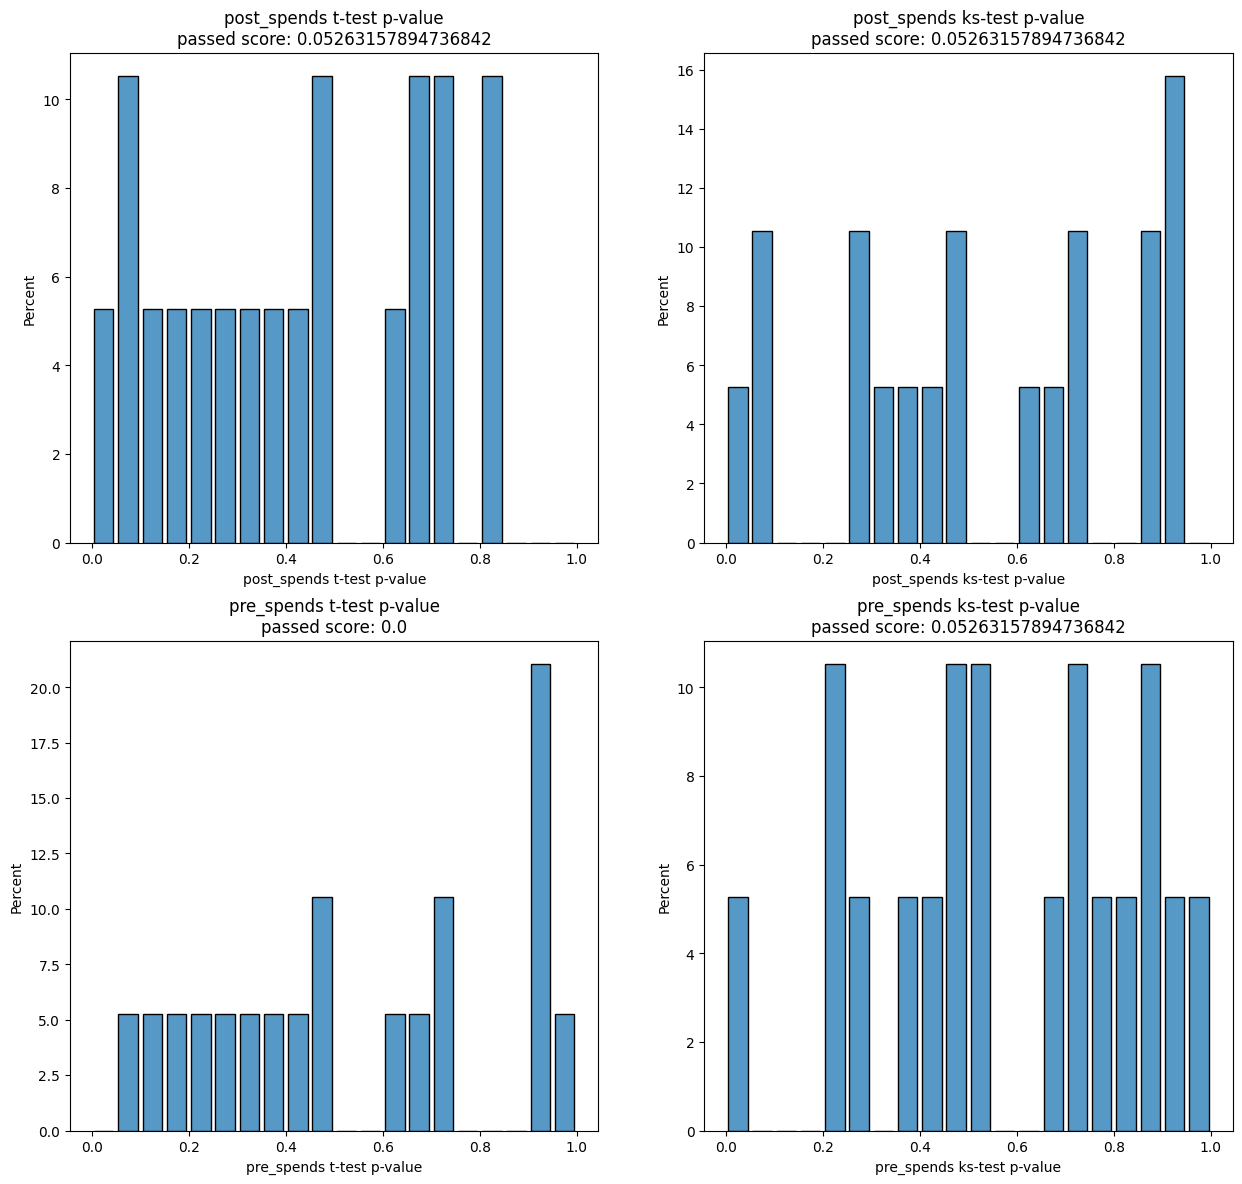

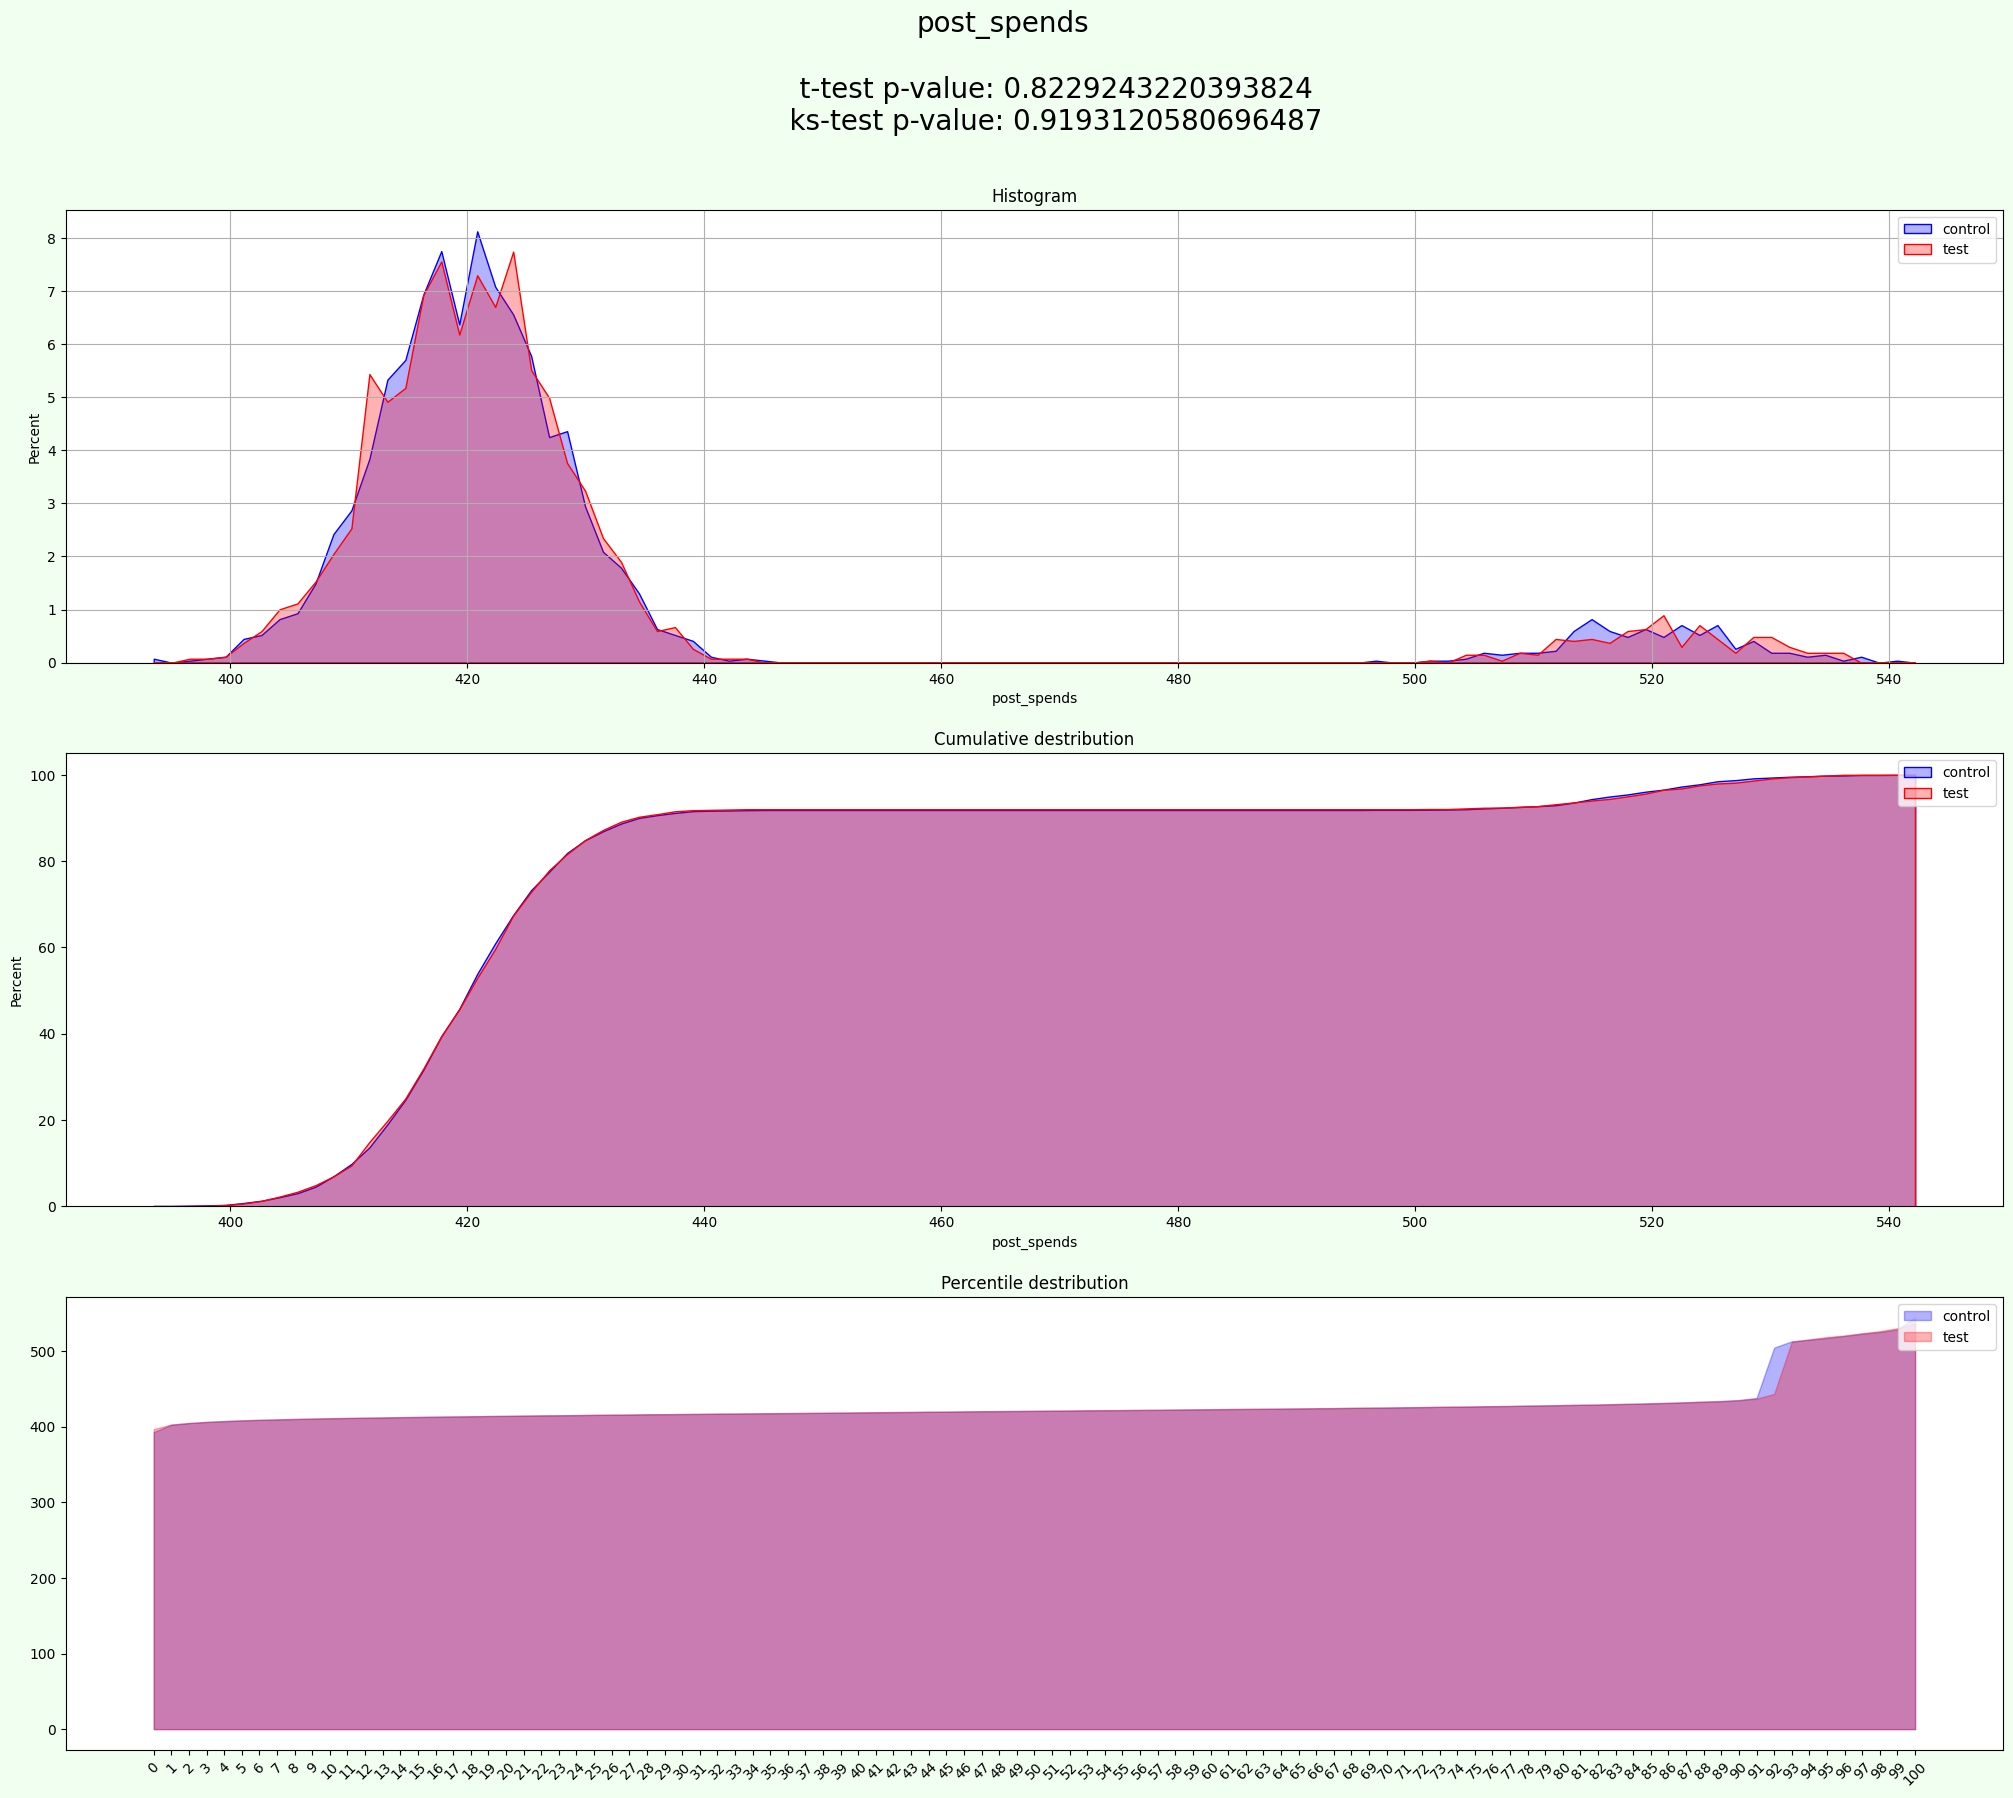

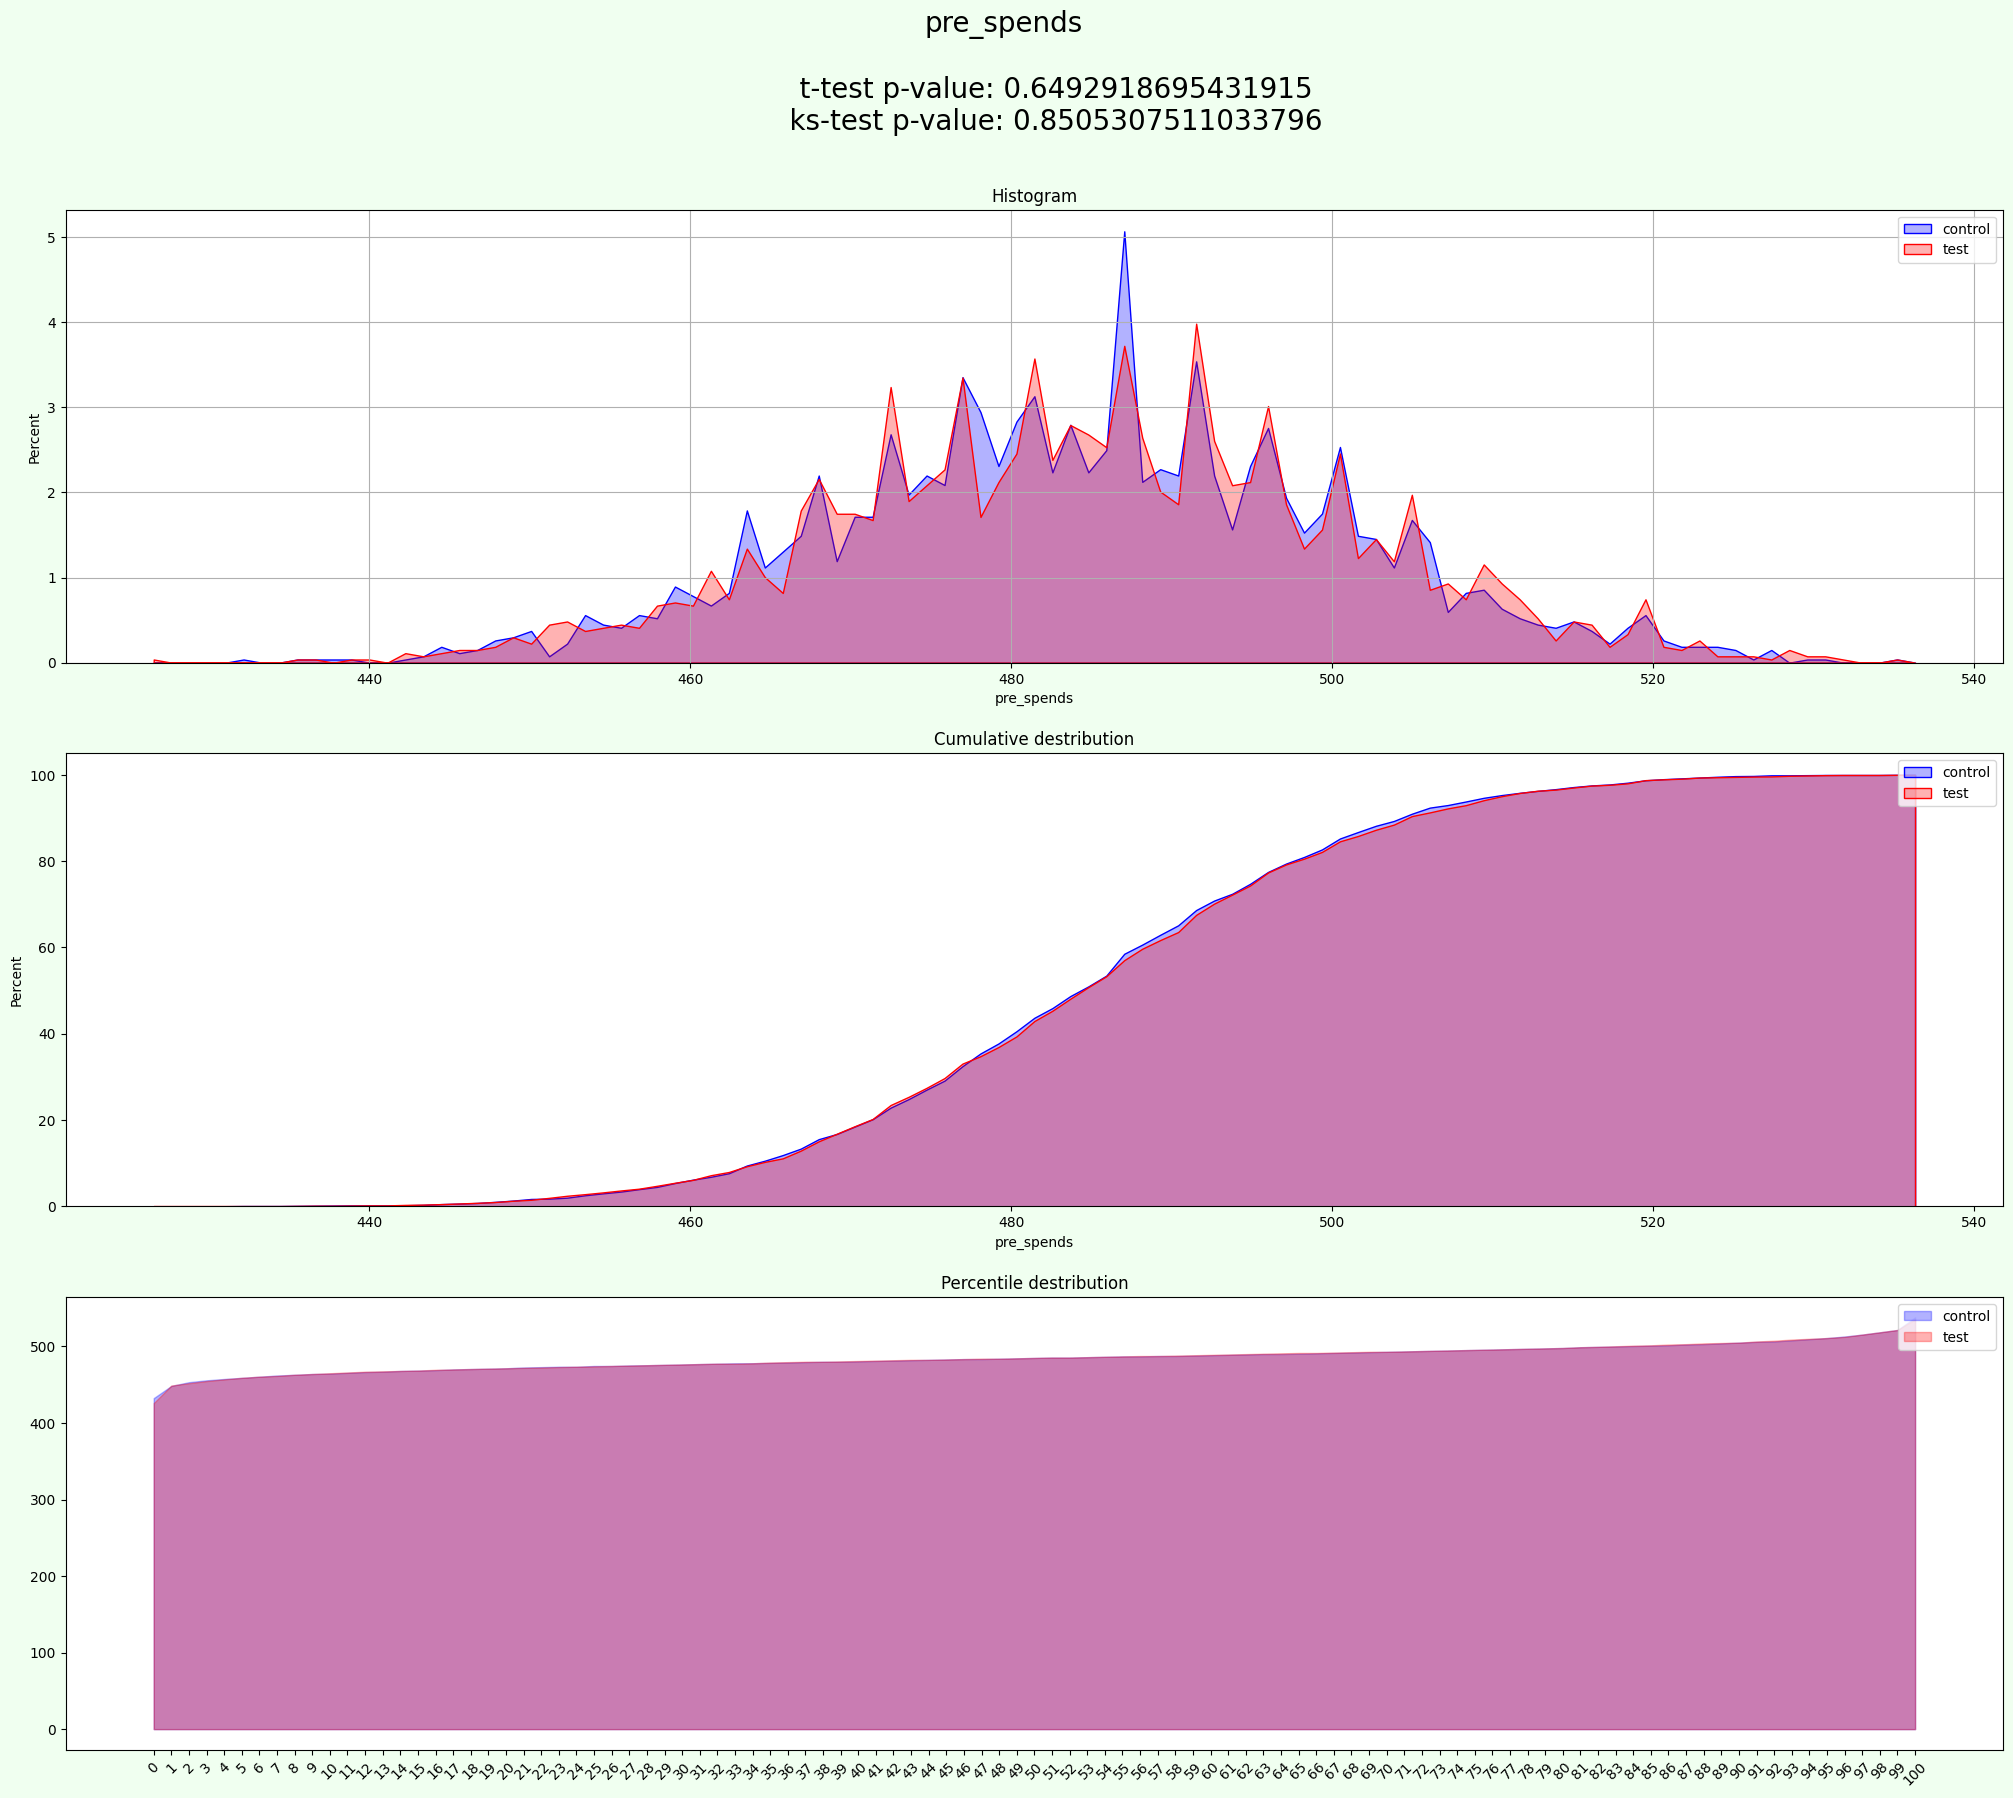

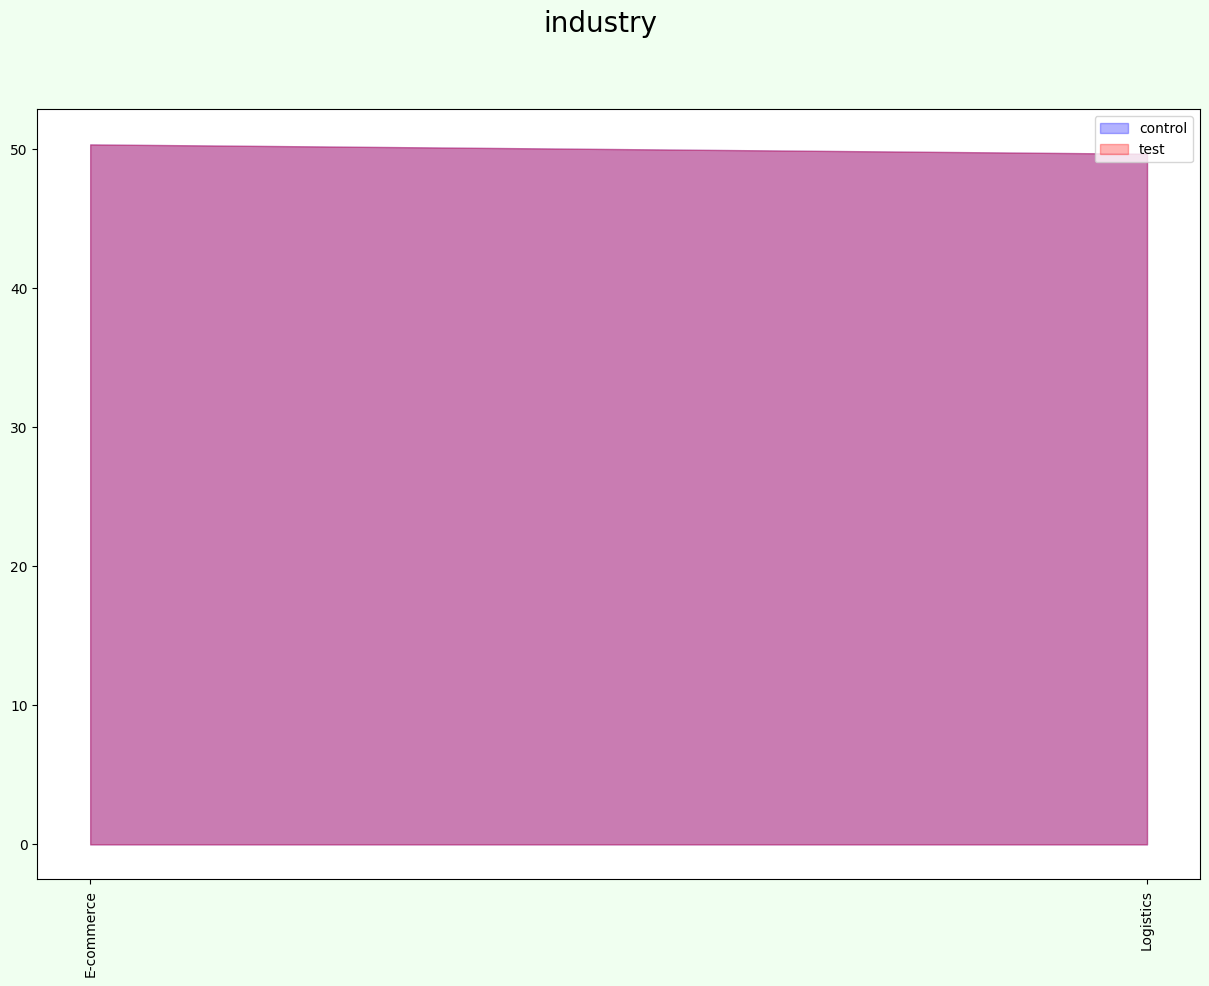

In [14]:
experiment_result, best_split = experiment.process(data=data, iterations=19)

The result is in the same format as without groups

In this regime groups equally divided on each sample (test and control):

In [15]:
best_split.groupby(['industry', 'group'])[['user_id']].count()

user_id
industry   group           
E-commerce control     1351
           test        1352
Logistics  control     1333
           test        1334

## AA with optimaize group

In [16]:
experiment.columns_labeling(data)

{'target_field': ['treat', 'pre_spends', 'post_spends', 'age'],
 'group_col': ['gender', 'industry']}

Group optimization:   0%|          | 0/3 [00:00<?, ?it/s]

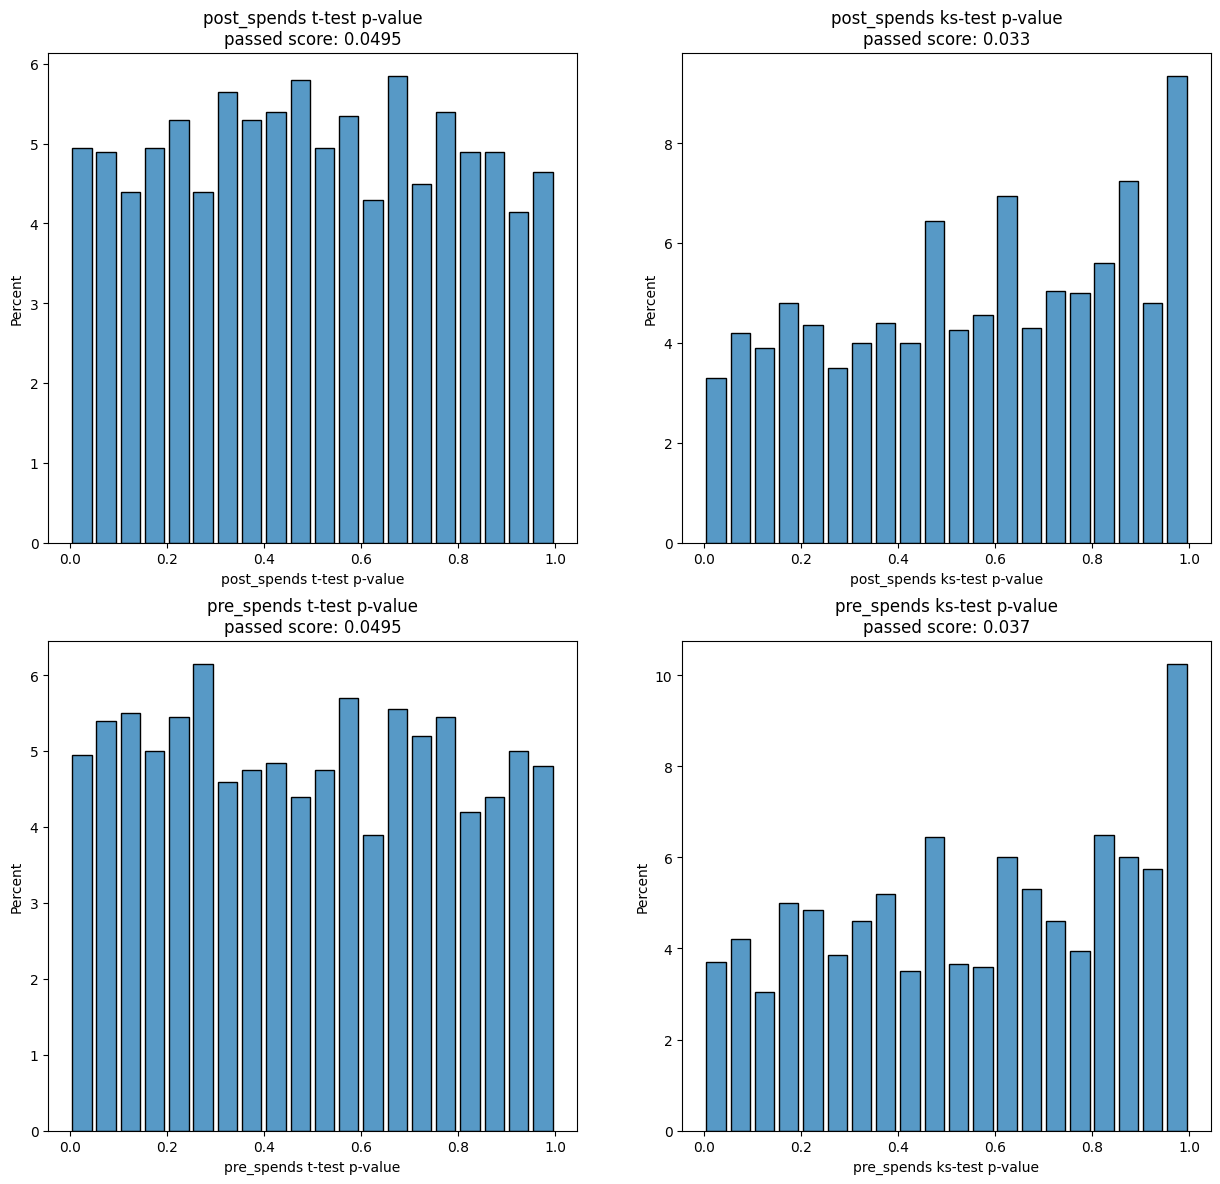

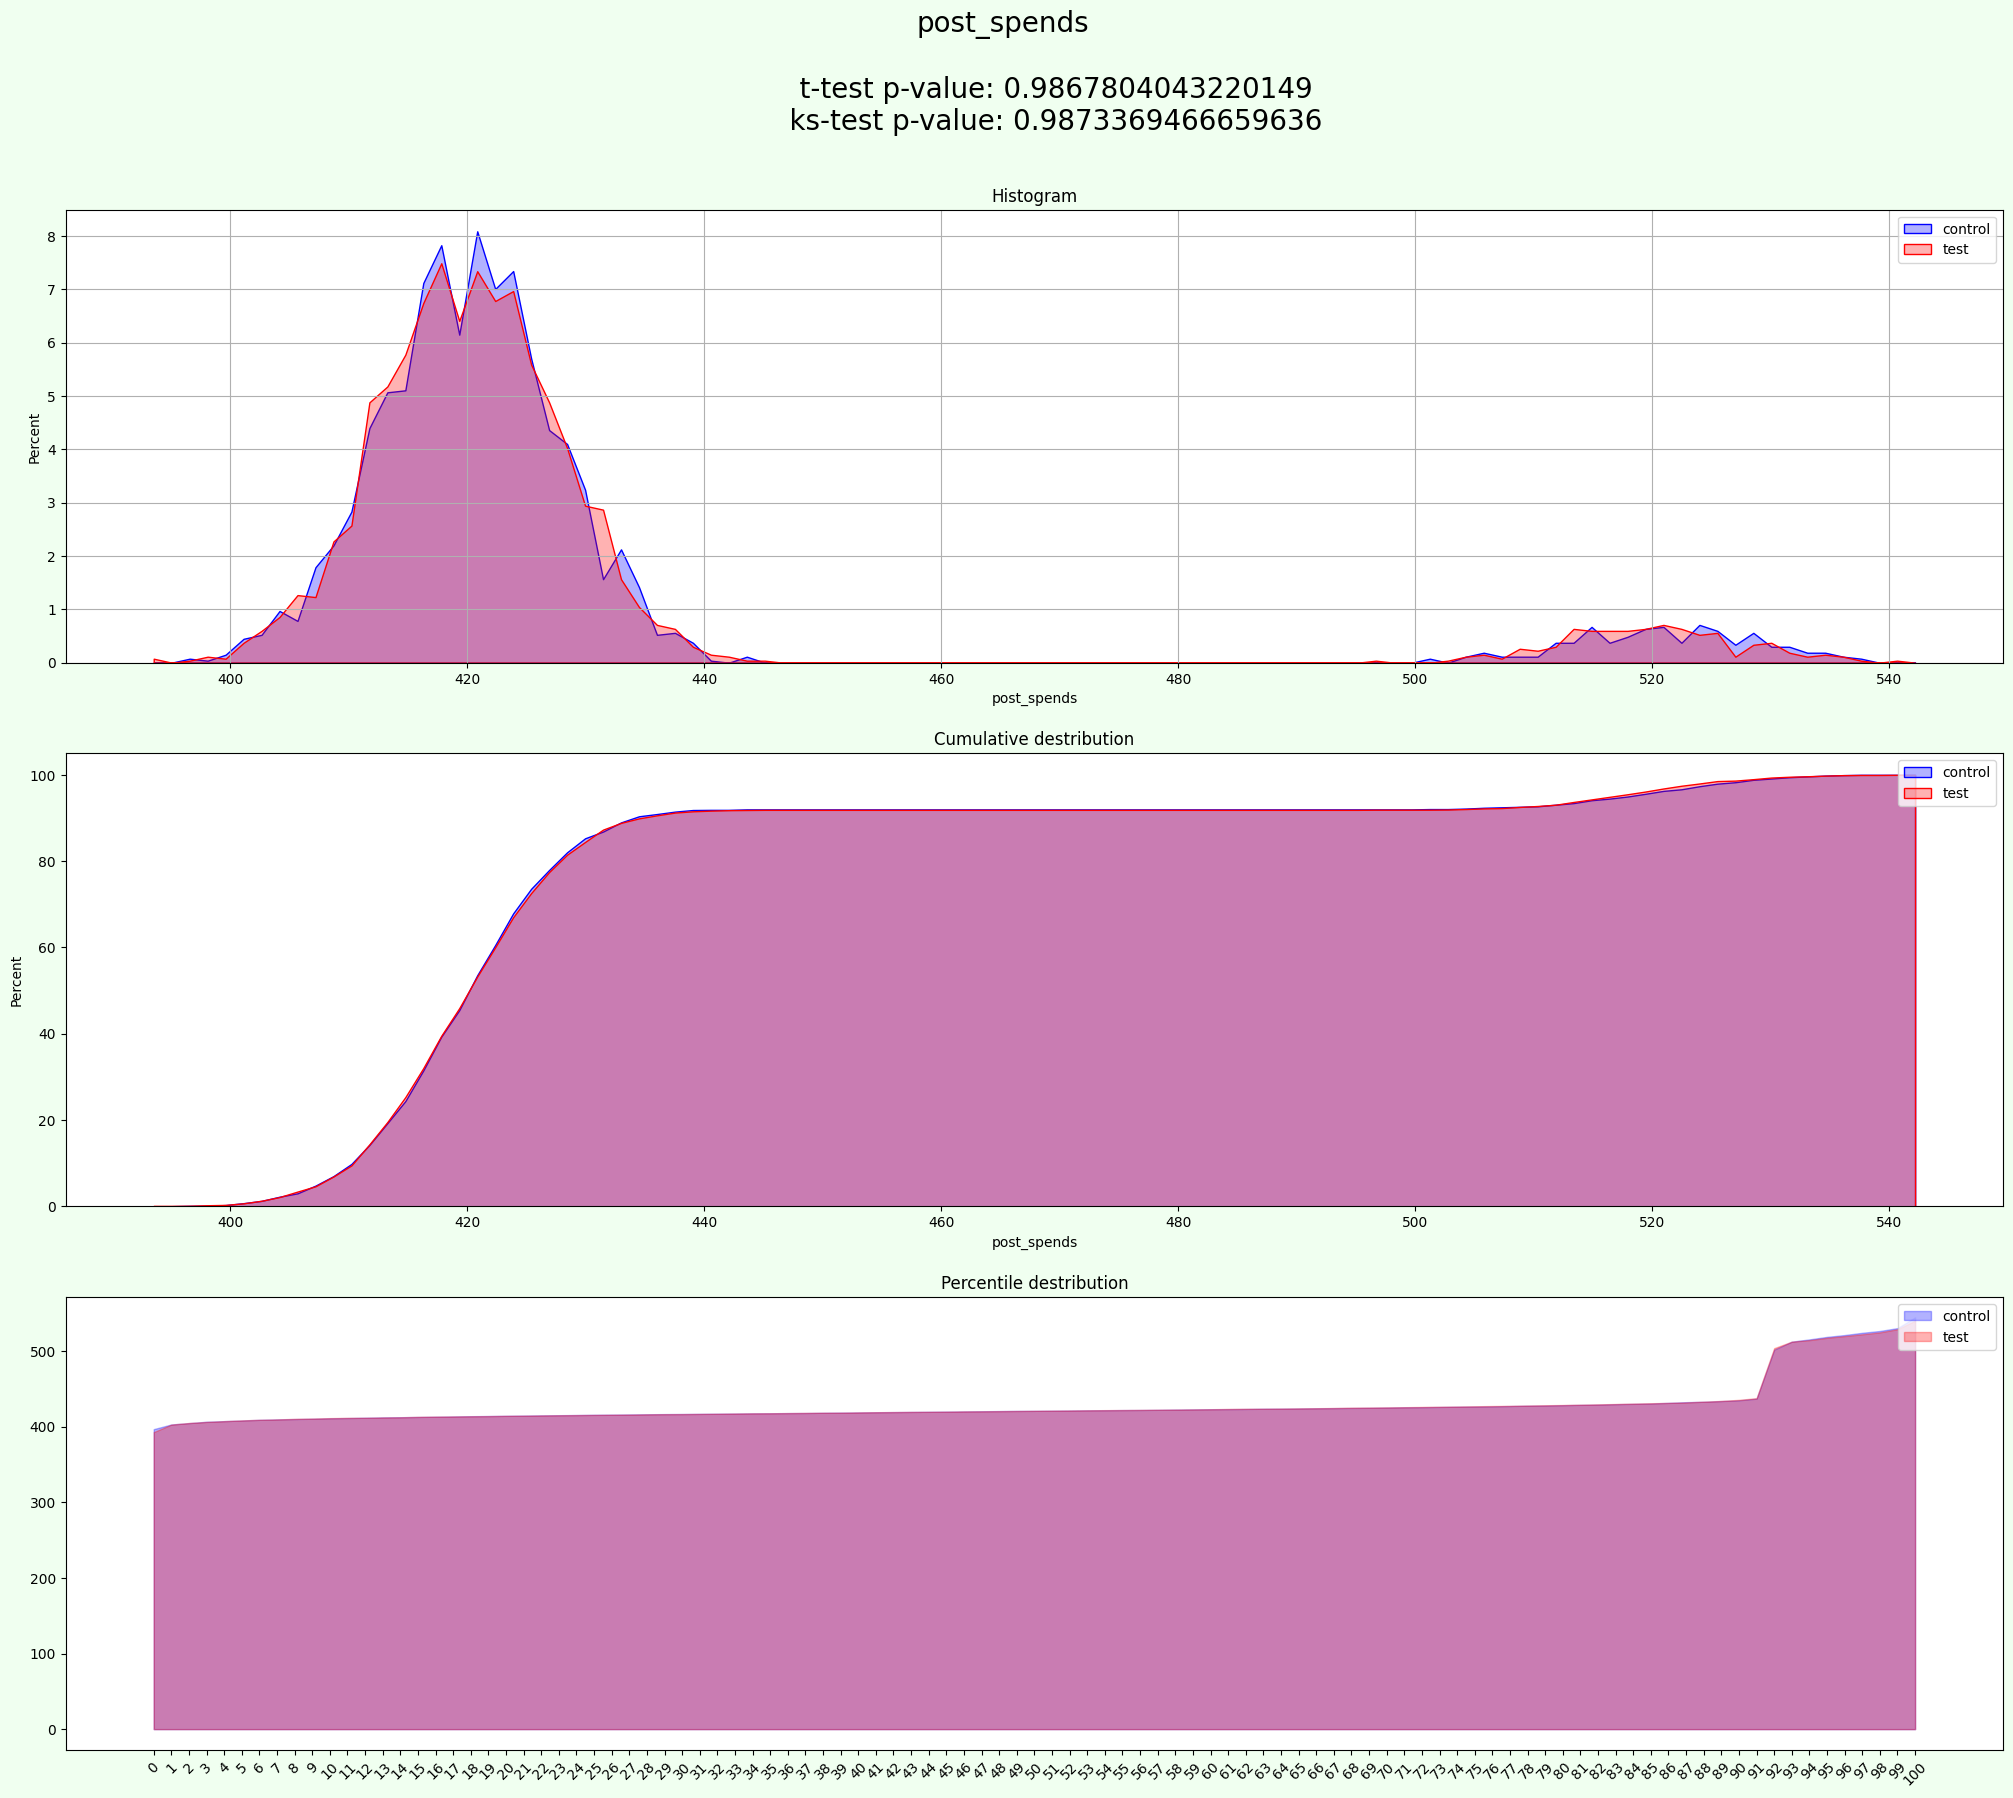

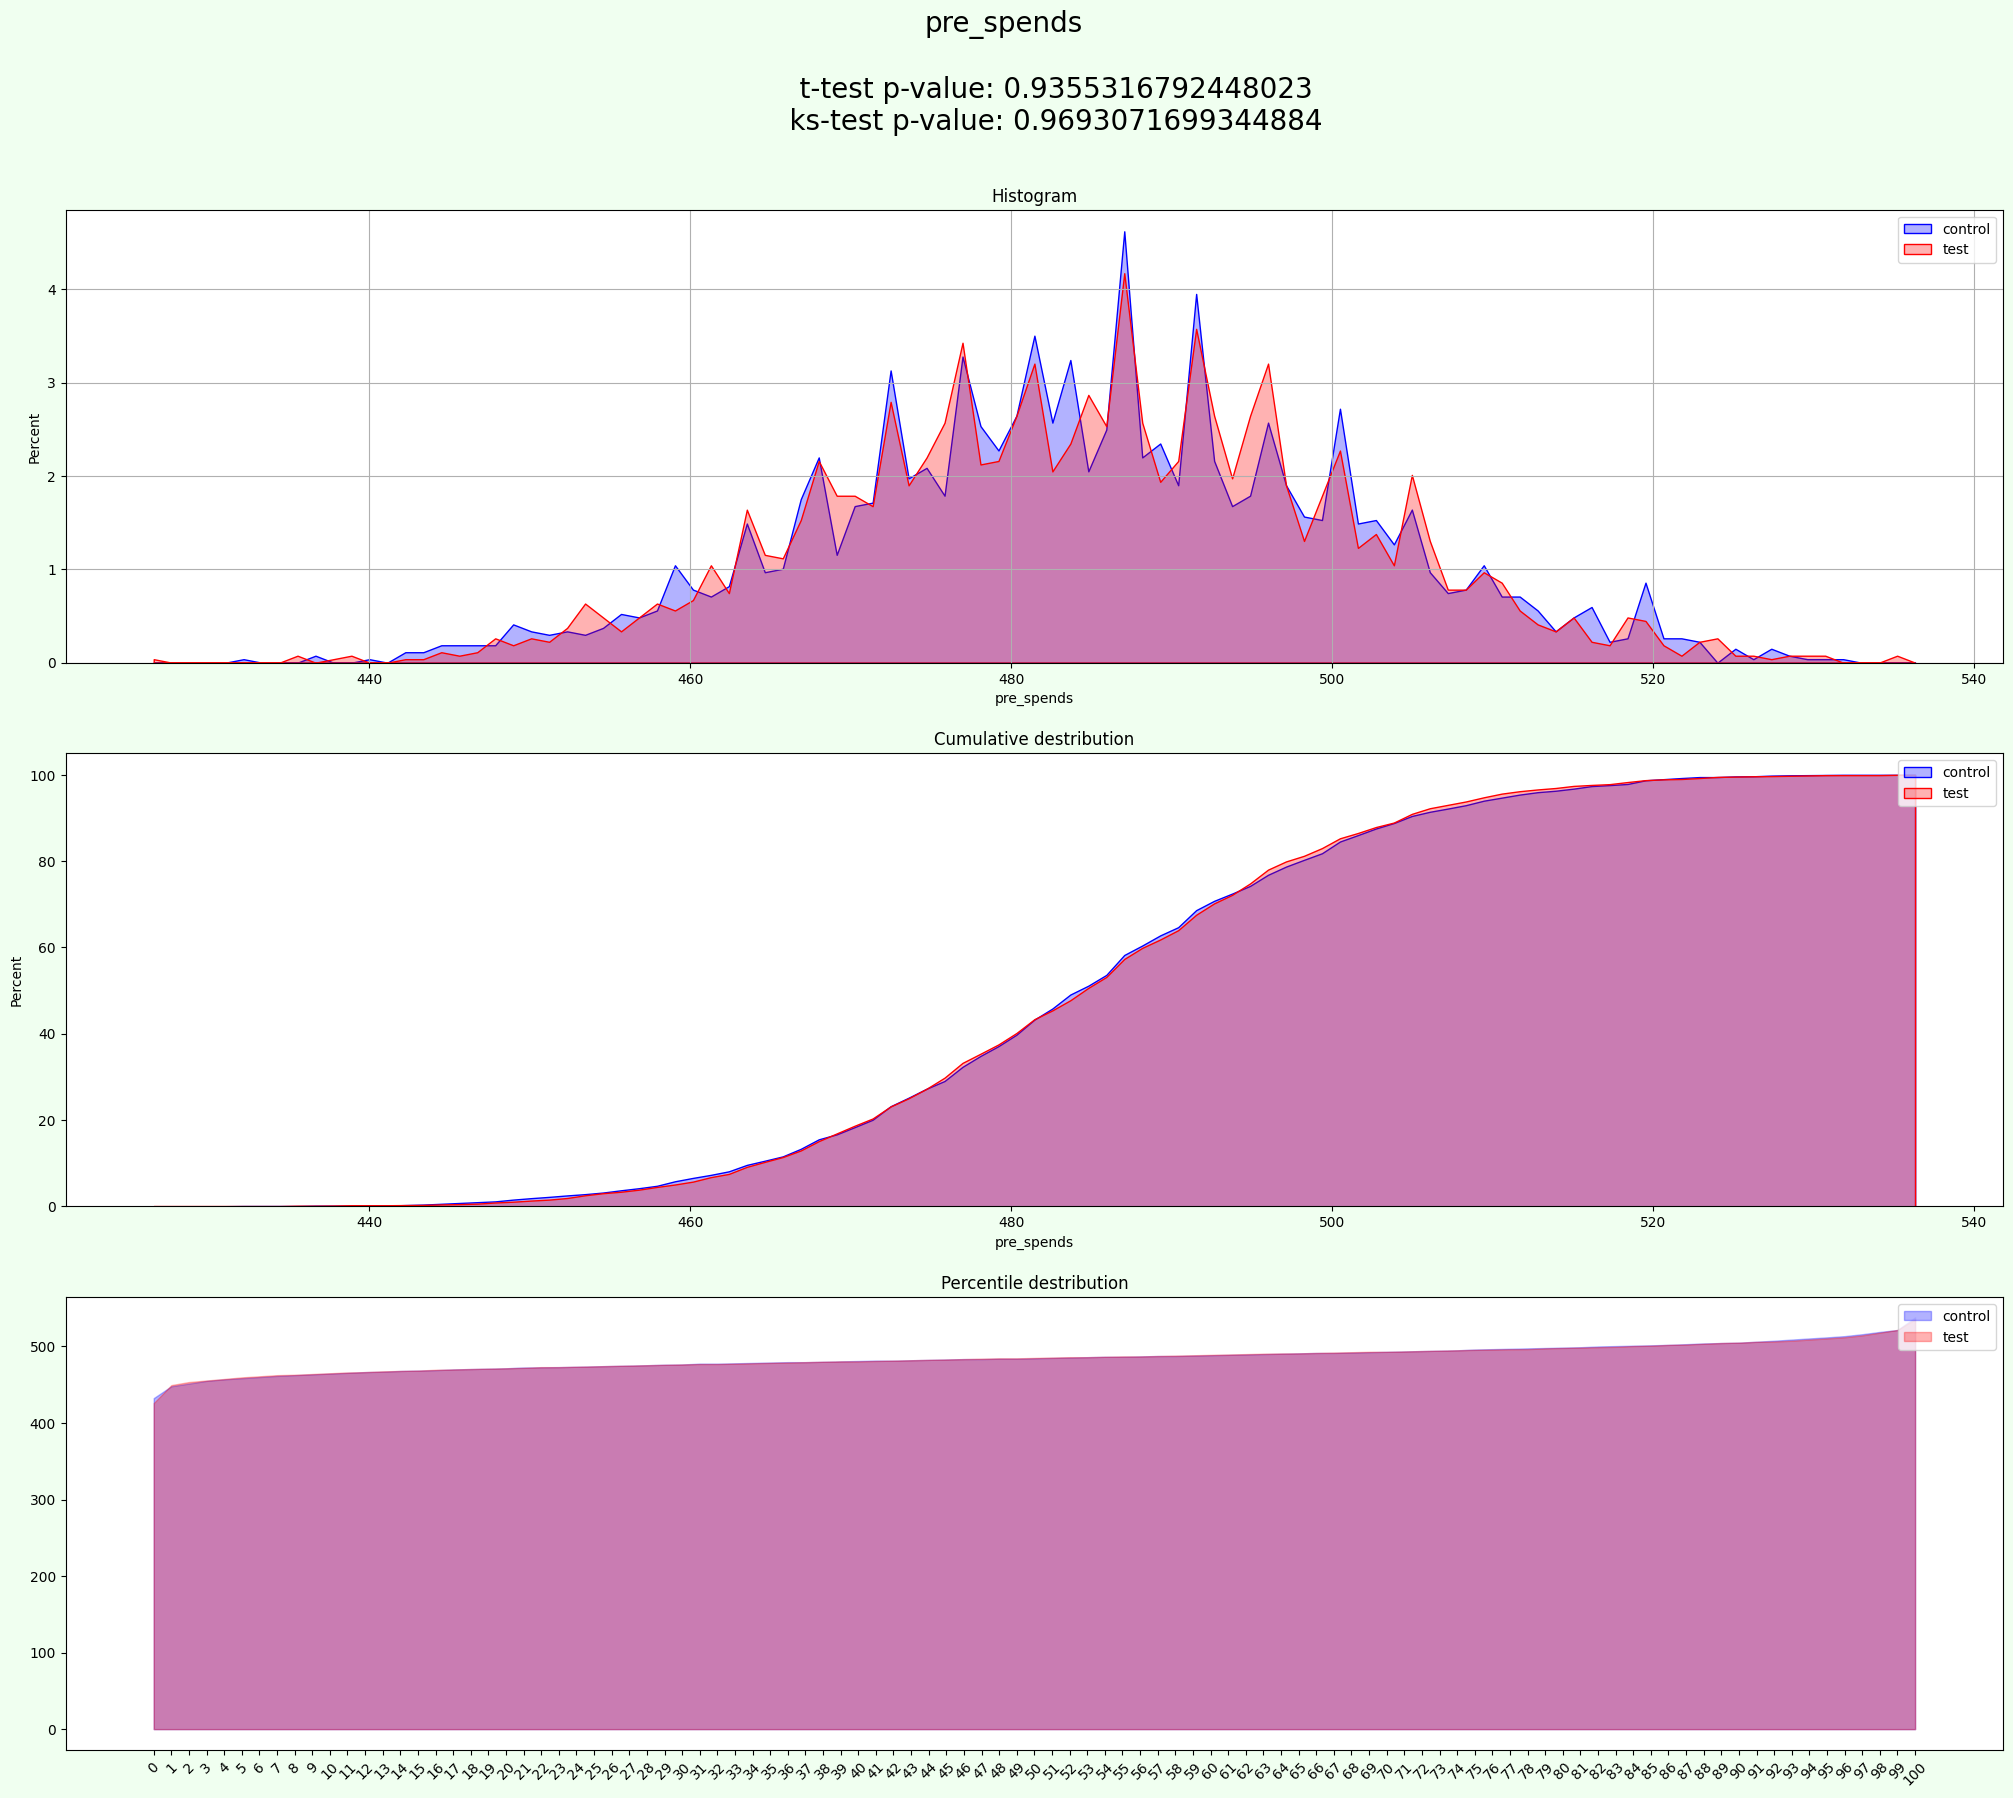

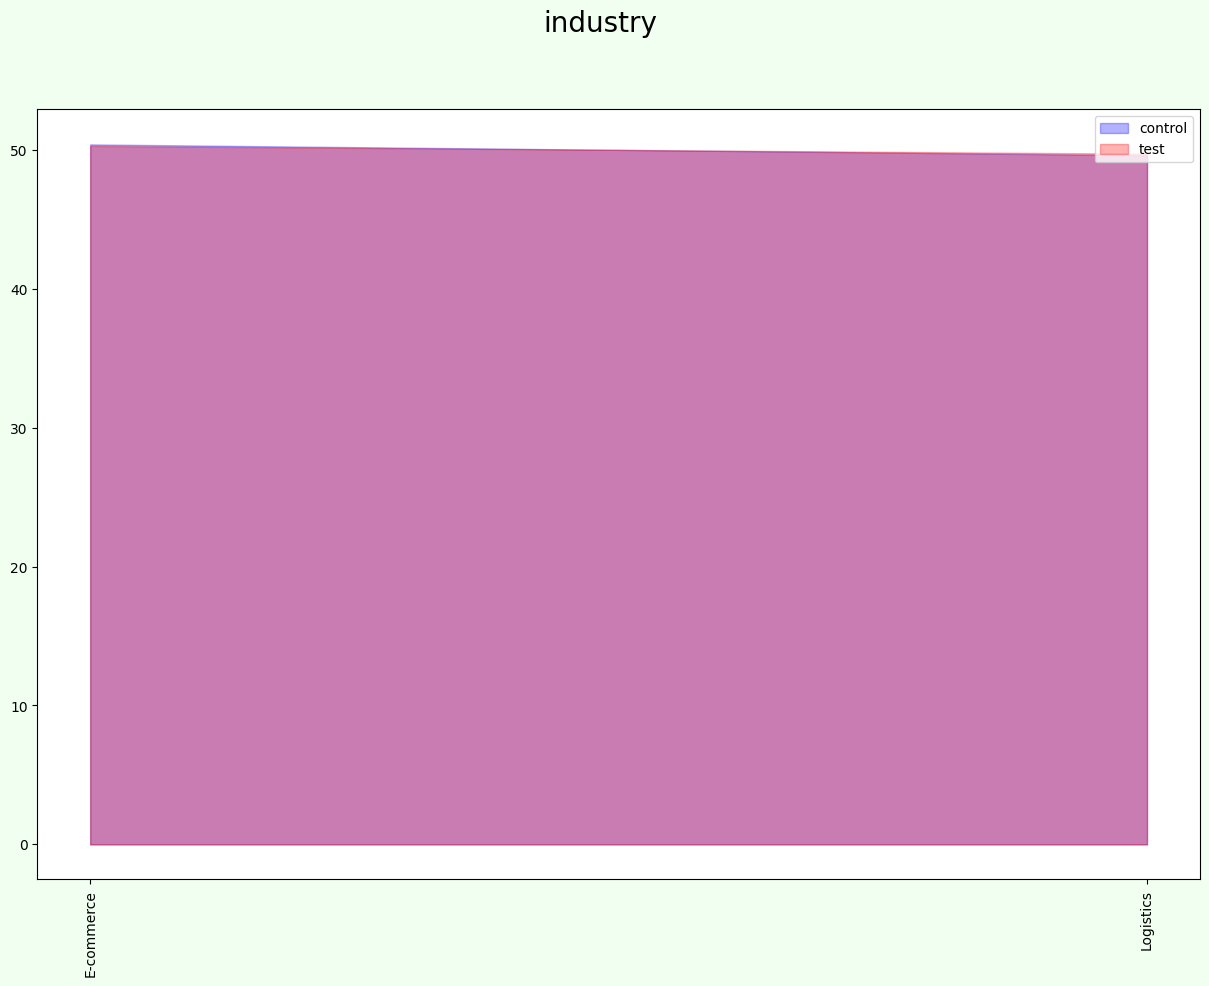

In [17]:
experiment_result, best_split = experiment.process(data=data, optimize_groups=True)

In [18]:
experiment.group_cols

['industry']

## 3. AB-test

### 3.0 Data
Lets correct data to see how AB-test works

In [19]:
data_ab = data.copy()

half_data = int(data.shape[0]/2)
data_ab['group'] = ['test']*half_data + ['control']*half_data
data_ab.head(3)

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,0,0,0,488.00,414.44,NaN,M,E-commerce,test
1,3,0,0,501.50,424.33,31.00,NaN,Logistics,test
2,10,0,0,522.50,416.22,64.00,M,E-commerce,test


### 3.1 Full AB-test

Full (basic) version of test includes calculation of all available metrics, which are: "diff in means", "diff in diff" and "cuped"<br>
Pay attention, that for "cuped" and "diff in diff" metrics requred target before pilot.

In [20]:
model = ABTest()
results = model.execute(
    data=data_ab, 
    target_field='post_spends', 
    target_field_before='pre_spends', 
    group_field='group'
)
results

{'size': {'test': 2685, 'control': 2685},
 'difference': {'ate': 0.9805090006207325,
  'cuped': 0.9764245308837758,
  'diff_in_diff': 0.39224084419618066},
 'p-value': {'t-test': 0.20533212744131016,
  'mann_whitney': 0.08089945933651932}}

To see results in more convenient way `show_beautiful_result` can be used

In [21]:
model.show_beautiful_result()

,size
test,2685
control,2685


,difference
ate,0.98
cuped,0.98
diff_in_diff,0.39


,p-value
t-test,0.21
mann_whitney,0.08


### 3.2 Simple AB-test
To estimate effect without target data before pilot `calc_difference_method='ate'` can be used - effect will be estimated with "diff in means" method

In [22]:
model = ABTest(calc_difference_method='ate')
model.execute(data=data_ab, target_field='post_spends', group_field='group')

model.show_beautiful_result()

,size
test,2685
control,2685


,difference
ate,0.98


,p-value
t-test,0.21
mann_whitney,0.08
